In [0]:
import tensorflow as tf

In [0]:
from tensorflow.examples.tutorials.mnist import input_data

In [33]:
mnist = input_data.read_data_sets('mnist-data', one_hot=True)

W0731 13:03:05.037677 140251456051072 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:262: extract_images (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.


Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting mnist-data/train-images-idx3-ubyte.gz


W0731 13:03:05.441437 140251456051072 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0731 13:03:05.446341 140251456051072 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.


Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting mnist-data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting mnist-data/t10k-images-idx3-ubyte.gz


W0731 13:03:05.698674 140251456051072 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting mnist-data/t10k-labels-idx1-ubyte.gz


In [34]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [35]:
mnist.train.images.shape

(55000, 784)

In [36]:
mnist.train.num_examples

55000

In [37]:
mnist.test.num_examples

10000

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
 mnist.train.images[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [40]:
mnist.train.images[0].shape

(784,)

In [41]:
mnist.train.images[0].reshape(28,28)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

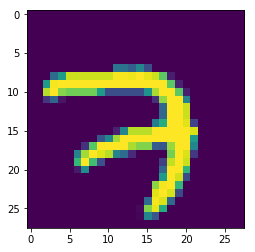

In [42]:
plt.imshow(mnist.train.images[0].reshape(28,28))

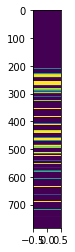

In [43]:
plt.imshow(mnist.train.images[0].reshape(784,1),aspect=0.01)

In [0]:
x = tf.placeholder(tf.float32, shape=[None, 784])

In [0]:
W = tf.Variable(tf.zeros(shape=[784, 10])) #as 10 classes of objects is there

In [0]:


b = tf.Variable(tf.zeros([10]))

In [0]:
y = tf.matmul(x,W) + b

In [0]:
y_true = tf.placeholder(tf.float32, shape=[None, 10])

In [0]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels = y_true, logits = y))

In [0]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)

In [0]:

train = optimizer.minimize(cross_entropy)

In [0]:
init = tf.global_variables_initializer()


In [53]:
with tf.Session() as sess:
  sess.run(init)
  for step in range(1000):
    batch_x, batch_y = mnist.train.next_batch(100)
    sess.run(train, feed_dict={x:batch_x, y_true:batch_y})
  matches = tf.equal(tf.argmax(y,1), tf.argmax(y_true,1))  
  acc = tf.reduce_mean(tf.cast(matches, tf.float32))
  print(sess.run(acc,feed_dict={x:mnist.test.images, y_true:mnist.test.labels}))

0.9175


In [0]:

# Via TF Estimators

In [0]:
import pandas as pd

In [0]:

df = pd.read_csv('IRIS.csv')

In [9]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [0]:
def converter(species):
  if species == 'Iris-setosa':
    return 0
  elif species == 'Iris-versicolor':
    return 1
  else:
    return 2

In [0]:
df['target'] = df['species'].apply(lambda x : converter(x))


In [0]:
df.drop('species', axis=1, inplace=True)

In [14]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [0]:
y = df['target'] 

In [0]:
X = df.drop('target', axis=1)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [0]:
#feature columns
feat_columns = []
for col in  X.columns:
  feat_columns.append(tf.feature_column.numeric_column(col))

In [20]:
feat_columns


[NumericColumn(key='sepal_length', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='sepal_width', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='petal_length', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='petal_width', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [0]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train, y=y_train, batch_size=10, num_epochs=5, shuffle=True)

In [22]:
classifier = tf.estimator.DNNClassifier(hidden_units=[10,20,10], n_classes=3,feature_columns=feat_columns)

W0731 12:56:47.668578 140251456051072 estimator.py:1811] Using temporary folder as model directory: /tmp/tmp_vgveuny


In [23]:
classifier.train(input_fn=input_func, steps=50)

W0731 12:56:49.095419 140251456051072 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/training/training_util.py:236: Variable.initialized_value (from tensorflow.python.ops.variables) is deprecated and will be removed in a future version.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
W0731 12:56:49.124067 140251456051072 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow_estimator/python/estimator/inputs/queues/feeding_queue_runner.py:62: QueueRunner.__init__ (from tensorflow.python.training.queue_runner_impl) is deprecated and will be removed in a future version.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
W0731 12:56:49.126946 140251456051072 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow_estimator/python/estimator/inputs/queues/feeding_functions.py:500: add_

In [0]:
pred_fn = tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=len(X_test), shuffle=
                                             False)

In [25]:
pred = list(classifier.predict(input_fn = pred_fn))

W0731 12:58:00.797890 140251456051072 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/training/saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


In [26]:
pred

[{'all_class_ids': array([0, 1, 2], dtype=int32),
  'all_classes': array([b'0', b'1', b'2'], dtype=object),
  'class_ids': array([2]),
  'classes': array([b'2'], dtype=object),
  'logits': array([-6.4234896 ,  0.04740457,  1.1837875 ], dtype=float32),
  'probabilities': array([3.7596098e-04, 2.4289373e-01, 7.5673032e-01], dtype=float32)},
 {'all_class_ids': array([0, 1, 2], dtype=int32),
  'all_classes': array([b'0', b'1', b'2'], dtype=object),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logits': array([ 1.9998313, -1.0575991, -4.4457264], dtype=float32),
  'probabilities': array([0.9536562 , 0.04482979, 0.00151399], dtype=float32)},
 {'all_class_ids': array([0, 1, 2], dtype=int32),
  'all_classes': array([b'0', b'1', b'2'], dtype=object),
  'class_ids': array([2]),
  'classes': array([b'2'], dtype=object),
  'logits': array([-5.1446505 ,  0.01290517,  0.16060594], dtype=float32),
  'probabilities': array([0.00265864, 0.46191046, 0.5354309 ], dtype=float32)}

In [0]:
final_preds = []

for i in pred:
  final_preds.append(i['class_ids'][0])

In [28]:
final_preds

[2,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 2,
 0,
 2,
 0,
 1,
 0,
 0,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 2,
 1,
 0,
 2,
 0,
 2]

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

In [30]:
print(confusion_matrix(y_test, final_preds))
print(classification_report(y_test, final_preds))


[[19  0  0]
 [ 0  2 12]
 [ 0  0 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.14      0.25        14
           2       0.50      1.00      0.67        12

    accuracy                           0.73        45
   macro avg       0.83      0.71      0.64        45
weighted avg       0.87      0.73      0.68        45

